## Import Libraries

In [725]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error

# Plot settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Reading and Exploring

In [726]:
df = pd.read_csv('./data.csv', delimiter=',', skipinitialspace= True)

In [727]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [729]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [730]:
df.dropna(inplace= True)

In [731]:
df = df.astype({
    'CryoSleep': np.bool8,
    'VIP': np.bool8,
    'Transported': np.bool8
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   bool   
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   bool   
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 638.7+ KB


In [732]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [733]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [734]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4158,4444_01,Earth,False,E/291/S,TRAPPIST-1e,40.0,False,0.0,901.0,0.0,0.0,89.0,Kenny Salez,False
5385,5756_01,Earth,False,F/1194/P,TRAPPIST-1e,51.0,False,542.0,0.0,360.0,0.0,0.0,Card Dicksons,False
1266,1345_01,Earth,False,F/260/S,TRAPPIST-1e,25.0,False,1174.0,0.0,18.0,721.0,0.0,Mistie Flowensley,False
2599,2786_01,Earth,False,E/190/S,PSO J318.5-22,53.0,False,0.0,1.0,0.0,195.0,493.0,Luise Franankson,True
1014,1083_02,Mars,True,F/206/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Pars Sfin,True


## Data visualization

Text(0.5, 1.0, 'How many passengers got transported to other dimension')

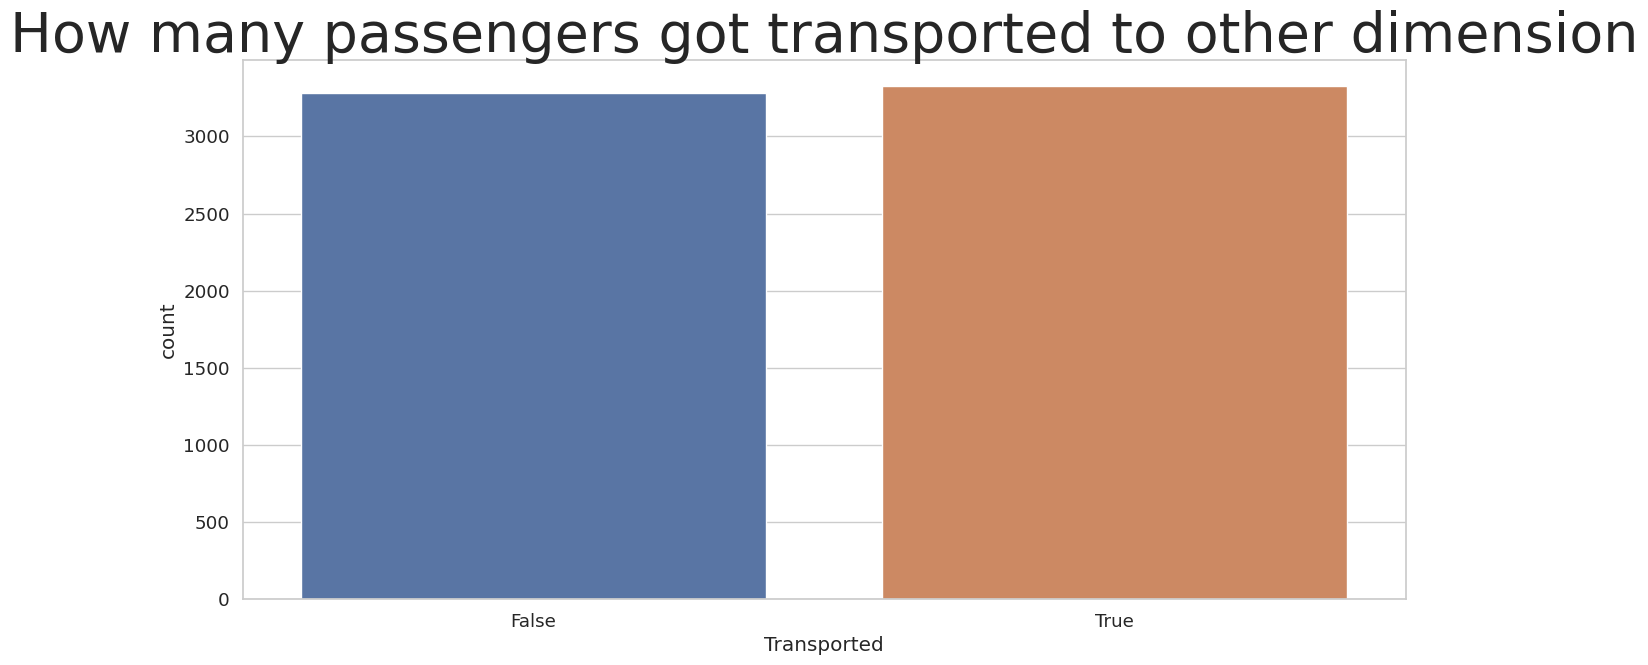

In [735]:
sns.countplot(df['Transported'])
plt.title('How many passengers got transported to other dimension', fontsize= 40)

Text(0.5, 1.0, 'How many passengers are VIP')

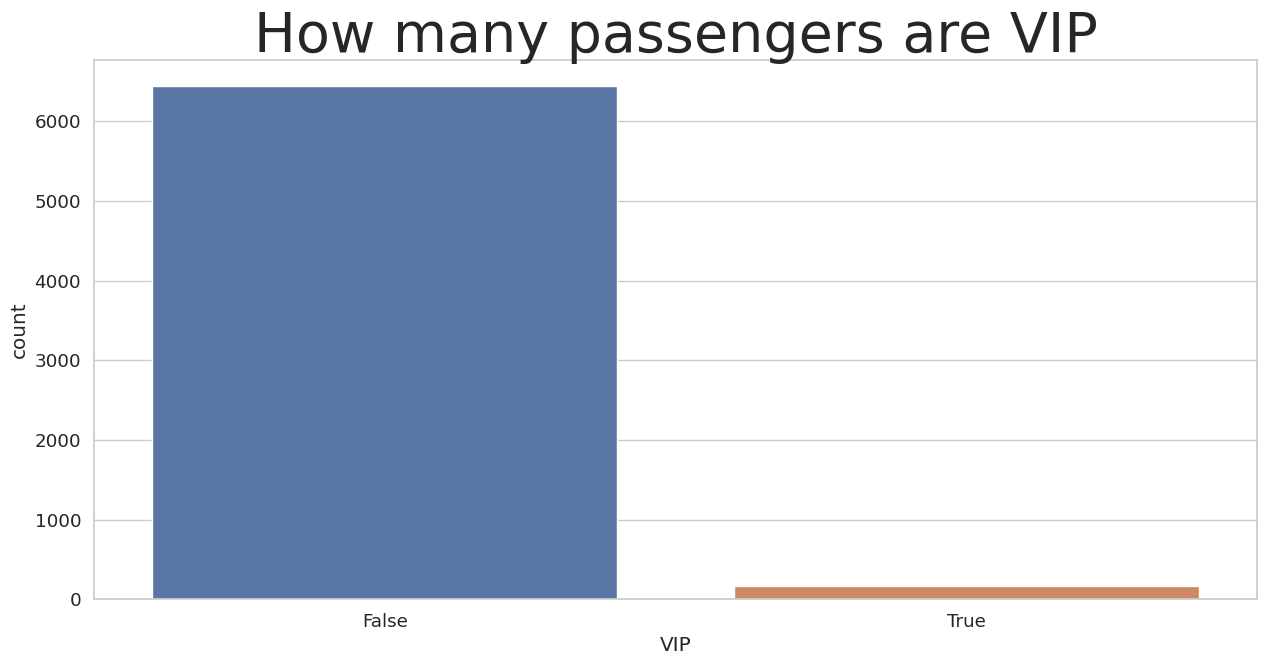

In [736]:
sns.countplot(df['VIP'])
plt.title('How many passengers are VIP', fontsize= 40)

Text(0.5, 1.0, 'Distribution of passengers age')

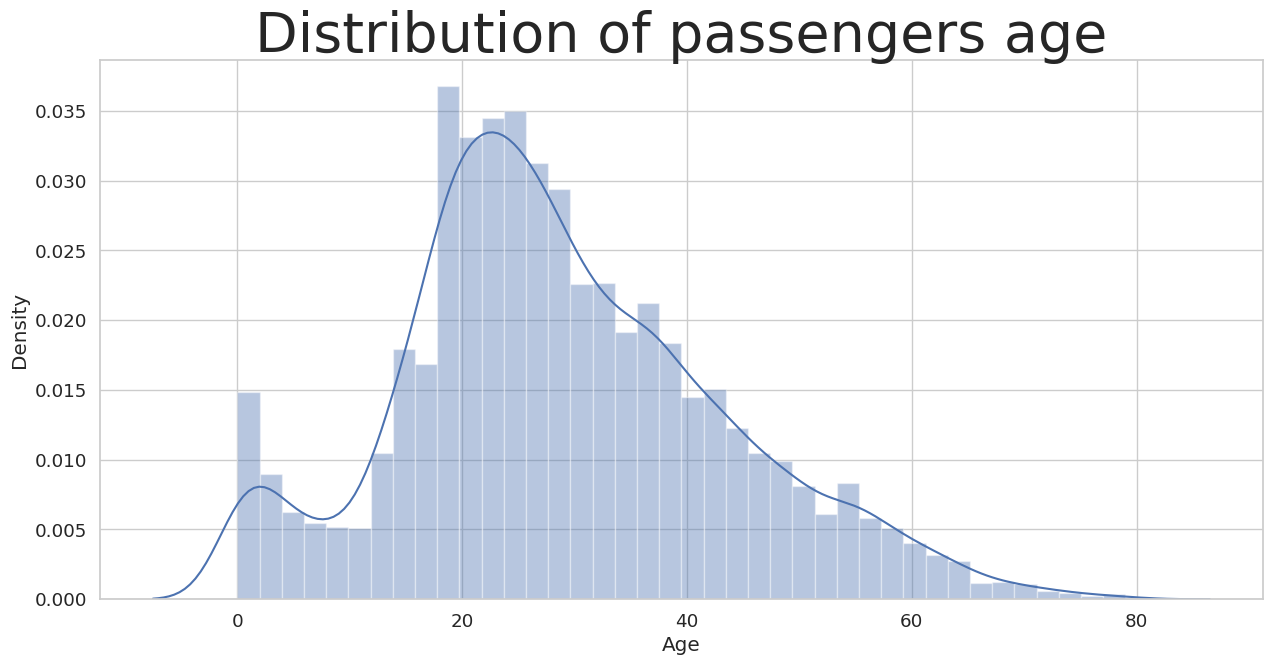

In [737]:
sns.distplot(df['Age'], kde= True)
plt.title('Distribution of passengers age', fontsize= 40)

Text(0.5, 1.0, 'How age affect transport rate')

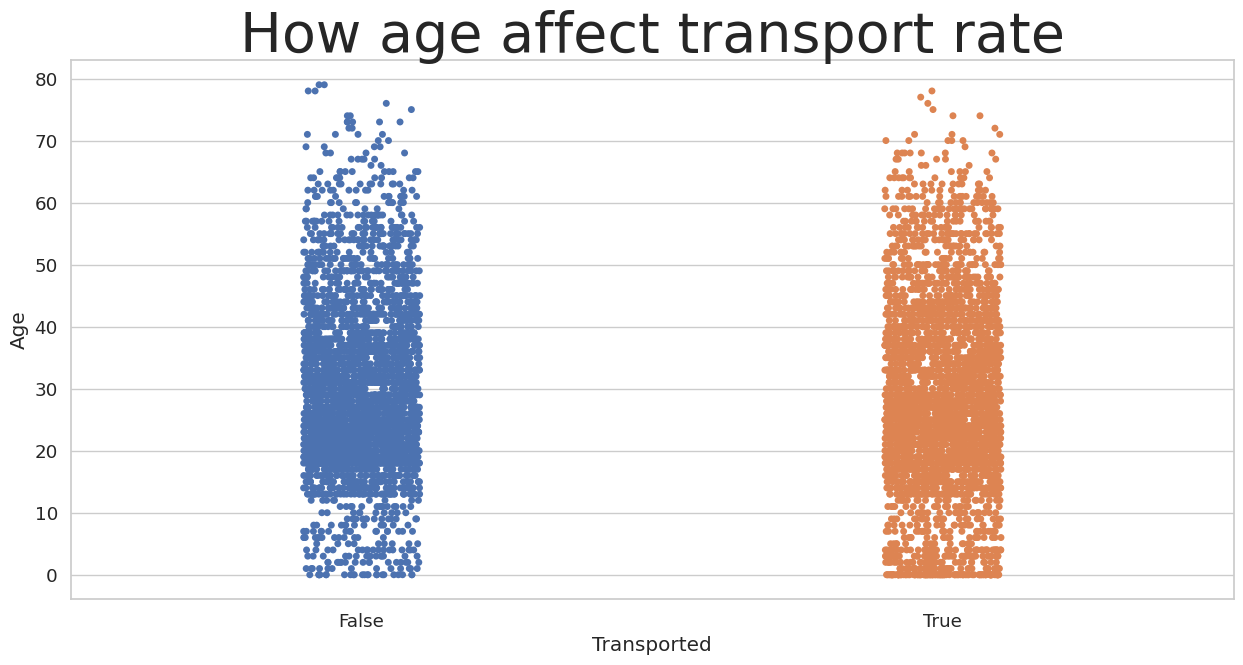

In [738]:
sns.stripplot(x= 'Transported', y= 'Age', data= df)
plt.title('How age affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How VIP status affect transport rate')

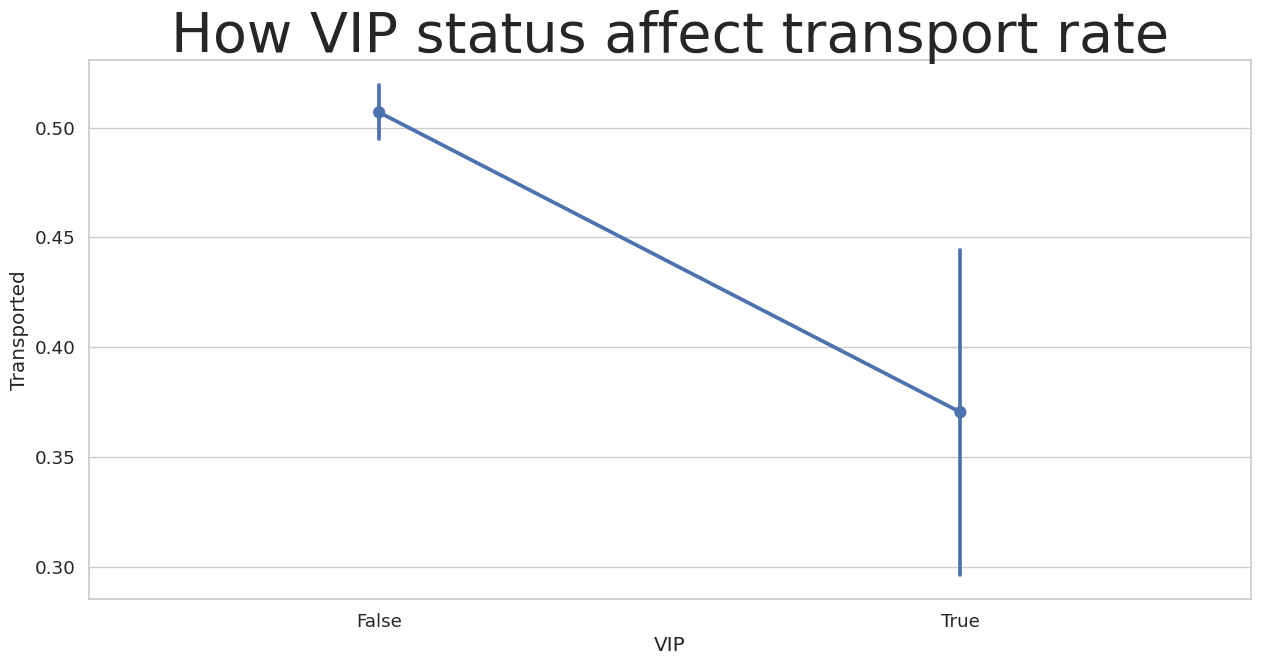

In [739]:
sns.pointplot(x= 'VIP', y= 'Transported', data= df)
plt.title('How VIP status affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How room service fee afect transport rate')

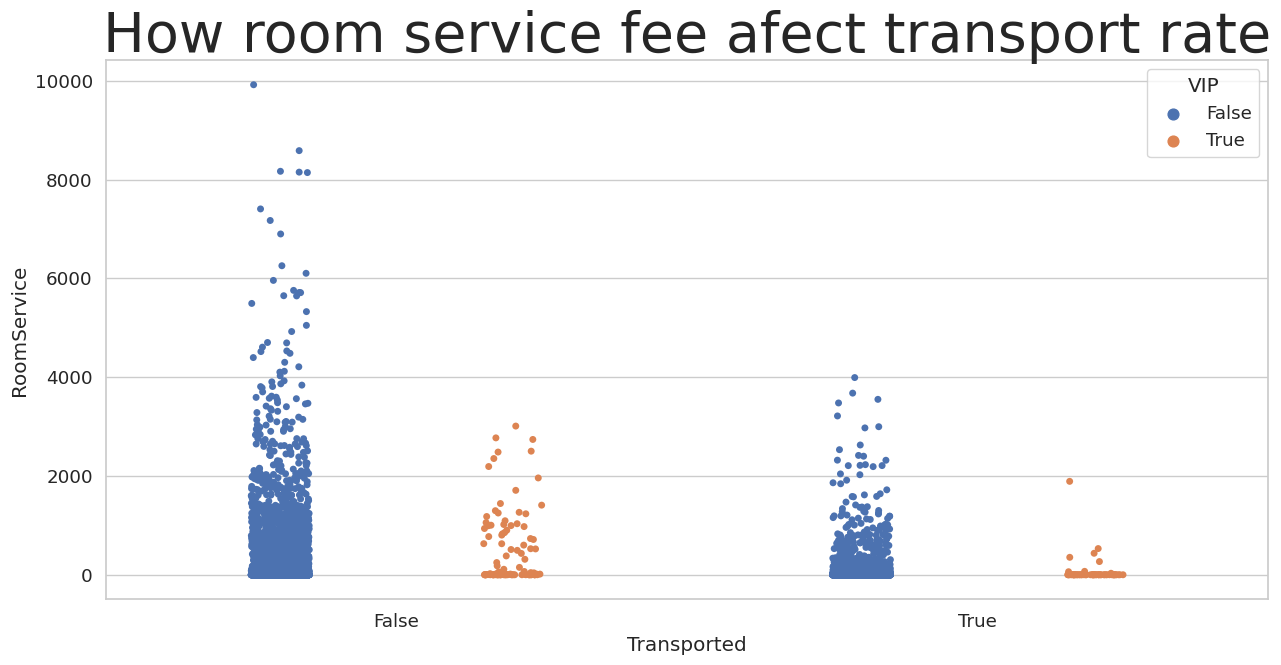

In [740]:
sns.stripplot(df['Transported'], df['RoomService'], hue= df['VIP'], dodge= True)
plt.title('How room service fee afect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How Food court fee affect Transport rate')

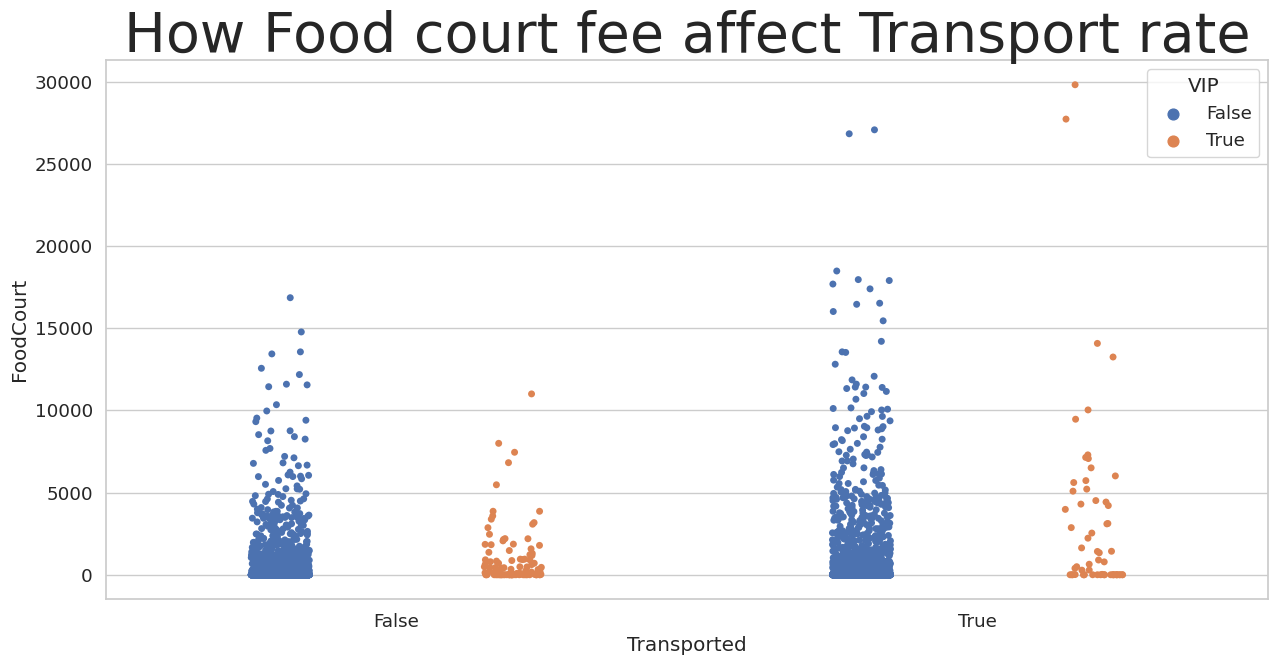

In [741]:
sns.stripplot(df['Transported'], df['FoodCourt'], hue= df['VIP'], dodge= True)
plt.title('How Food court fee affect Transport rate', fontsize= 40)

Text(0.5, 1.0, 'How shopping mall fee affect transport rate')

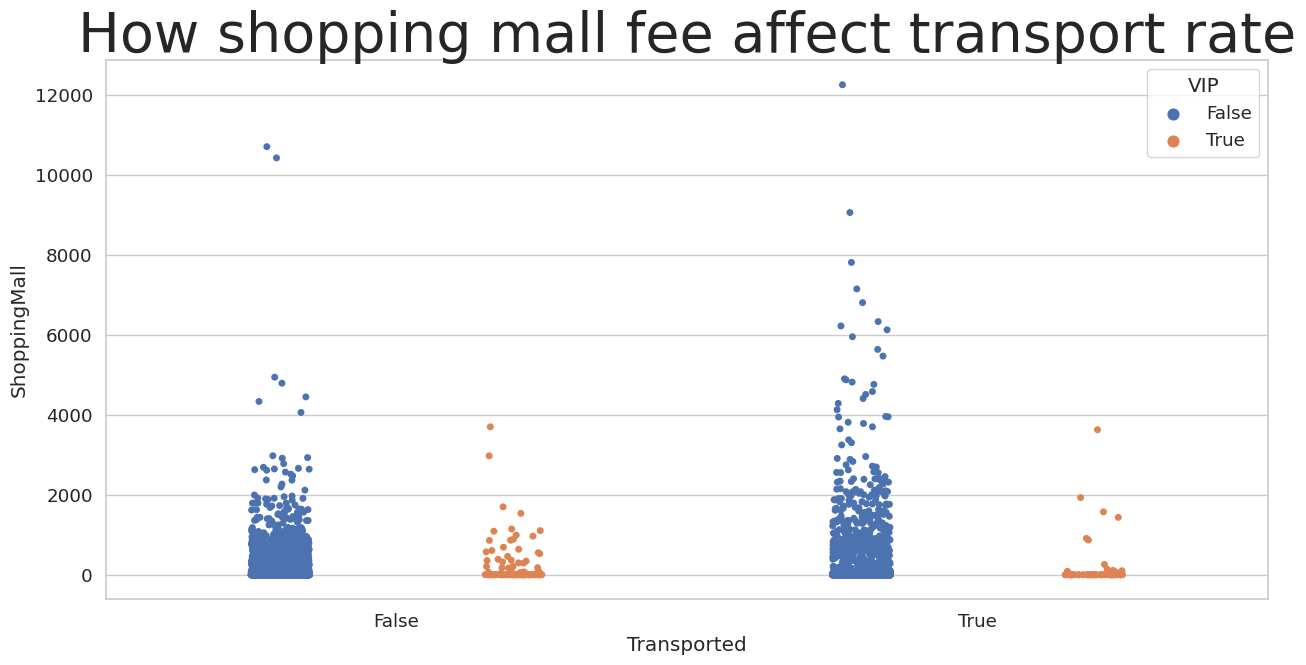

In [742]:
sns.stripplot(df['Transported'], df['ShoppingMall'], hue= df['VIP'], dodge= True)
plt.title('How shopping mall fee affect transport rate', fontsize= 40)

Text(0.5, 1.0, 'How Cryosleep affect Transport rate')

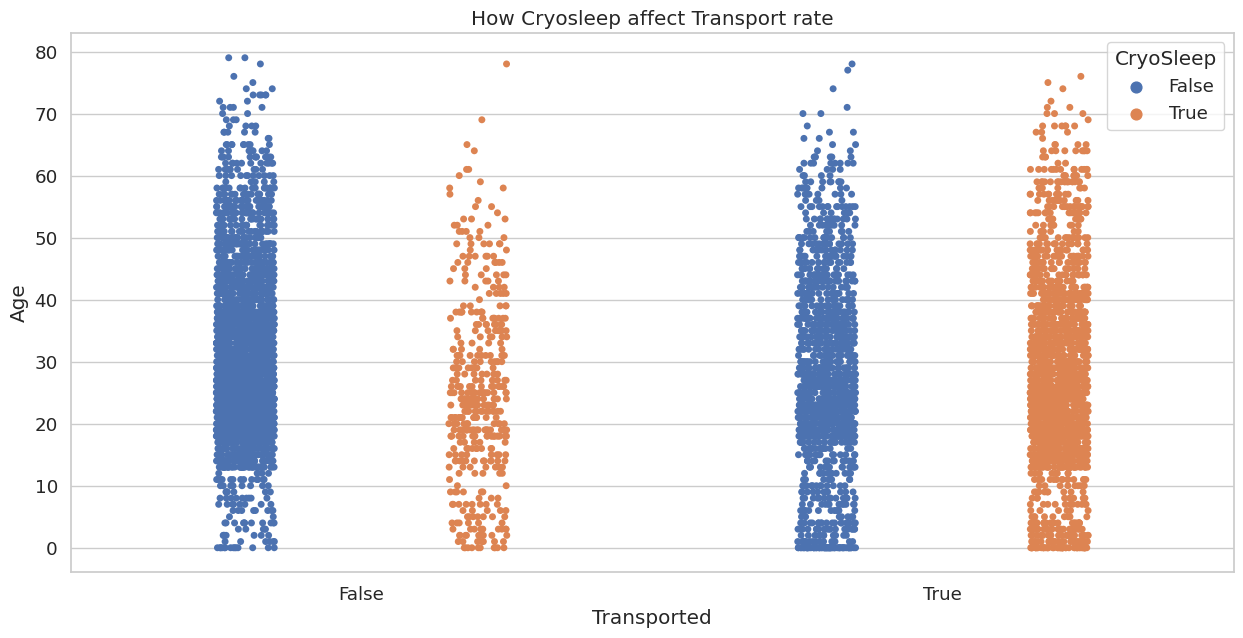

In [743]:
sns.stripplot(df['Transported'], df['Age'], hue= df['CryoSleep'], dodge= True)
plt.title('How Cryosleep affect Transport rate')

In [744]:
mask = np.triu(np.ones_like(df.corr().abs()))

Text(0.5, 1.0, 'Correlation between values')

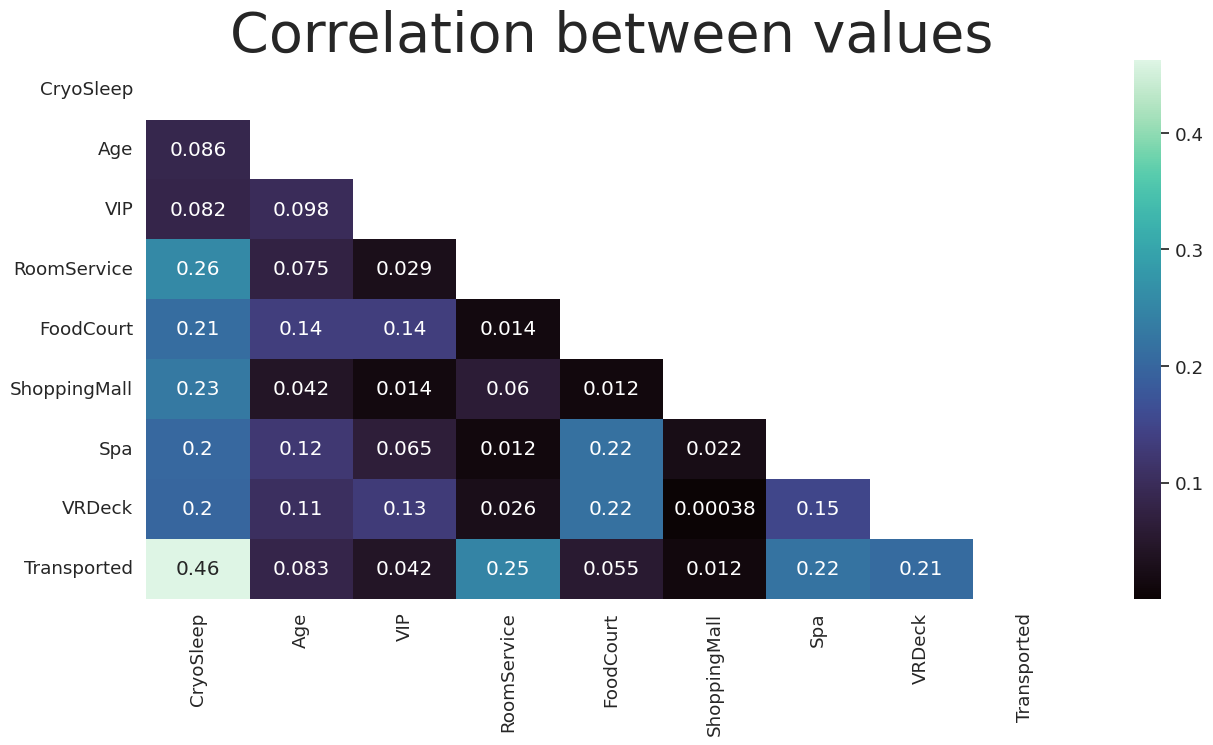

In [745]:
sns.heatmap(df.corr().abs(), cmap= 'mako', annot= True, mask= mask)
plt.title('Correlation between values', fontsize= 40)

## Feature Engineering

### Make different fee values into small, high, medium

In [746]:
df['RoomService'].describe()

count    6606.000000
mean      222.991674
std       644.987936
min         0.000000
25%         0.000000
50%         0.000000
75%        49.000000
max      9920.000000
Name: RoomService, dtype: float64

In [747]:
def rs_fee(x):
    if x <= 222:
        return 0
    elif x > 222 and x <= 644:
        return 1
    else:
        return 2

In [748]:
df['RoomService'] = df['RoomService'].apply(rs_fee)

In [749]:
df['FoodCourt'].describe()

count     6606.000000
mean       478.958523
std       1678.592291
min          0.000000
25%          0.000000
50%          0.000000
75%         82.750000
max      29813.000000
Name: FoodCourt, dtype: float64

In [750]:
def fc_fee(x):
    if x <= 478:
        return 0
    elif x > 478 and x <= 1678:
        return 1
    else:
        return 2

In [751]:
df['FoodCourt'] = df['FoodCourt'].apply(fc_fee)

In [752]:
df['ShoppingMall'].describe()

count     6606.000000
mean       178.356494
std        576.328407
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max      12253.000000
Name: ShoppingMall, dtype: float64

In [753]:
def sm_fee(x):
    if x <= 178:
        return 0
    elif x > 178 and x <= 576:
        return 1
    else:
        return 2

In [754]:
df['ShoppingMall'] = df['ShoppingMall'].apply(sm_fee)

In [755]:
df['Spa'].describe()

count     6606.000000
mean       313.161520
std       1144.016291
min          0.000000
25%          0.000000
50%          0.000000
75%         65.000000
max      22408.000000
Name: Spa, dtype: float64

In [756]:
def sp_fee(x):
    if x <= 313:
        return 0
    elif x > 313 and x <= 1114:
        return 1
    else:
        return 2

In [757]:
df['Spa'] = df['Spa'].apply(sp_fee)

In [758]:
df['VRDeck'].describe()

count     6606.000000
mean       303.780048
std       1127.142166
min          0.000000
25%          0.000000
50%          0.000000
75%         52.000000
max      20336.000000
Name: VRDeck, dtype: float64

In [759]:
def vr_fee(x):
    if x <= 303:
        return 0
    elif x > 303 and x <= 1127:
        return 1
    else:
        return 2

In [760]:
df['VRDeck'] = df['VRDeck'].apply(vr_fee)

### Make True and false variables to 0 and 1

In [761]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
754,0791_01,Earth,True,G/115/P,PSO J318.5-22,24.0,False,0,0,0,0,0,Neila Mcfarmerson,False
7319,7833_01,Europa,False,B/305/S,55 Cancri e,34.0,False,0,2,0,2,2,Ainkard Spandisket,False
802,0848_02,Mars,True,F/175/P,TRAPPIST-1e,14.0,False,0,0,0,0,0,Monam Raca,True
7811,8338_02,Mars,False,F/1716/P,TRAPPIST-1e,45.0,False,1,0,0,1,0,Rail Empie,False
6843,7232_01,Europa,False,B/240/P,TRAPPIST-1e,51.0,False,0,1,1,2,1,Auvair Seatearing,False


In [762]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

In [763]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8514,9081_08,Earth,1,G/1476/P,PSO J318.5-22,3.0,0,0,0,0,0,0,Virgie Clemondsey,1
2374,2553_01,Europa,1,D/87/S,TRAPPIST-1e,30.0,0,0,0,0,0,0,Grafik Obnoftle,1
7766,8289_01,Earth,1,G/1350/P,TRAPPIST-1e,14.0,0,0,0,0,0,0,Stendy Fredersend,0
8597,9178_01,Earth,0,F/1877/P,TRAPPIST-1e,53.0,0,0,1,0,0,0,Ernard Barnoldeney,0
2708,2901_01,Earth,0,F/601/P,TRAPPIST-1e,16.0,0,0,0,0,0,1,Jeanna Vandez,0


## Preprocessing

### Clasyfy data

In [764]:
nums = df.select_dtypes(exclude= 'object').columns
nums

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [765]:
cats = df.select_dtypes(include= 'object').columns
cats

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')

### Handling nominal data

In [766]:
df = pd.get_dummies(df, columns= cats, drop_first= True)

### Spliting data

In [767]:
X, y = df.drop('Transported', axis= 1), df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [768]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_0002_01,PassengerId_0003_01,...,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
7052,0,19.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5284,0,24.0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7559,0,39.0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3103,0,32.0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,0,53.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4317,0,36.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2214,0,36.0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3468,0,34.0,1,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


### Handling numerical data

In [769]:
nums = nums.drop('Transported')

In [770]:
scalar = StandardScaler()
scalar.fit(X_train[nums])

StandardScaler()

In [771]:
X_train[nums] = scalar.transform(X_train[nums])
X_test[nums] = scalar.transform(X_test[nums])

## Modeling

In [772]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayers': GaussianNB()
}

In [791]:
Results = {
    'Model': [],
    'Train Score': [],
    'Test Score': [],
    'RMSE': []
}

In [792]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    RMSE = mean_absolute_error((y_pred), y_test)
    Results['Model'].append(name)
    Results['Train Score'].append(train_s)
    Results['Test Score'].append(test_s)
    Results['RMSE'].append(RMSE)
    print('Model: ', name)
    print('Train Score: ', train_s)
    print('Test Score: ', test_s)
    print('RMSE: ', round(RMSE, 2))
    print("======================")

Model:  Logistic Regression
Train Score:  0.9496107266435986
Test Score:  0.7815338042381433
RMSE:  0.22
Model:  Decision Tree
Train Score:  1.0
Test Score:  0.781029263370333
RMSE:  0.22
Model:  Random Forest
Train Score:  0.9997837370242214
Test Score:  0.7759838546922301
RMSE:  0.22
Model:  Naive Bayers
Train Score:  1.0
Test Score:  0.49697275479313824
RMSE:  0.5


In [793]:
scores = pd.DataFrame(Results)

In [794]:
scores

,Model,Train Score,Test Score,RMSE
0,Logistic Regression,0.949611,0.781534,0.218466
1,Decision Tree,1.000000,0.781029,0.218971
2,Random Forest,0.999784,0.775984,0.224016
3,Naive Bayers,1.000000,0.496973,0.503027


Text(0.5, 1.0, 'Train Score')

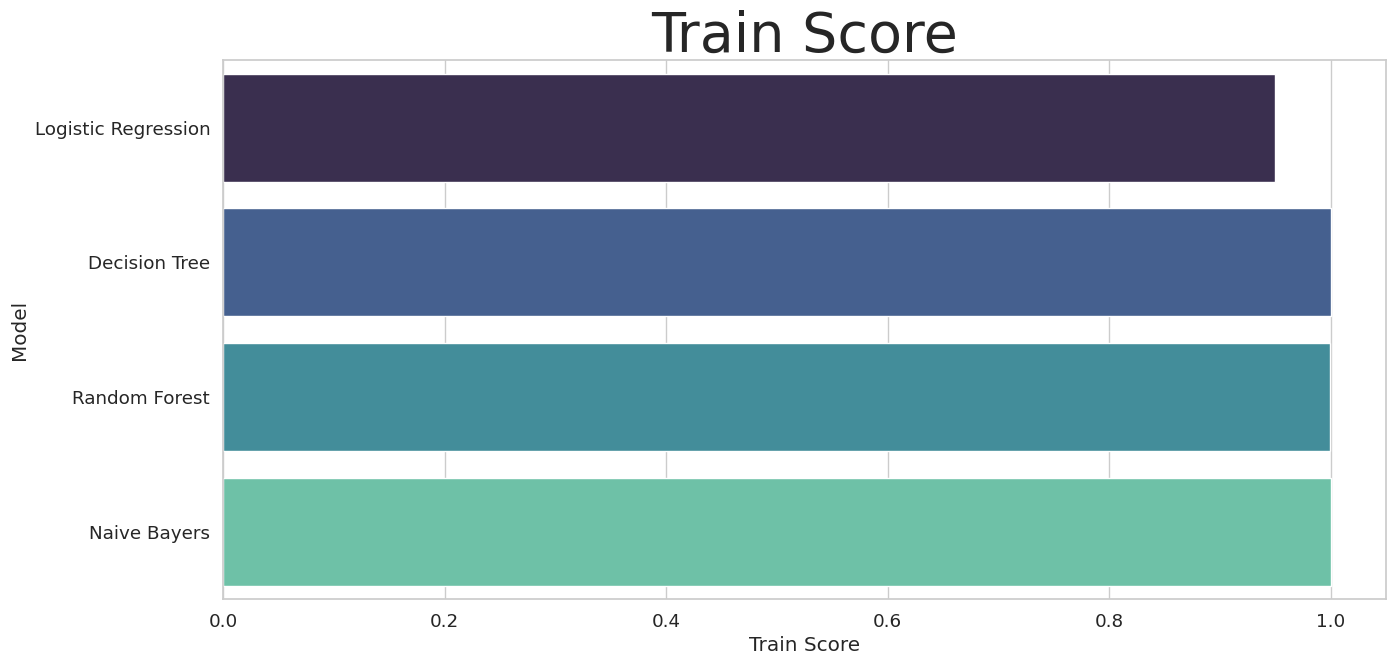

In [796]:
sns.barplot(y= 'Model', x= 'Train Score', data= scores, palette= 'mako')
plt.title('Train Score', fontsize= 40)

Text(0.5, 1.0, 'Test Score')

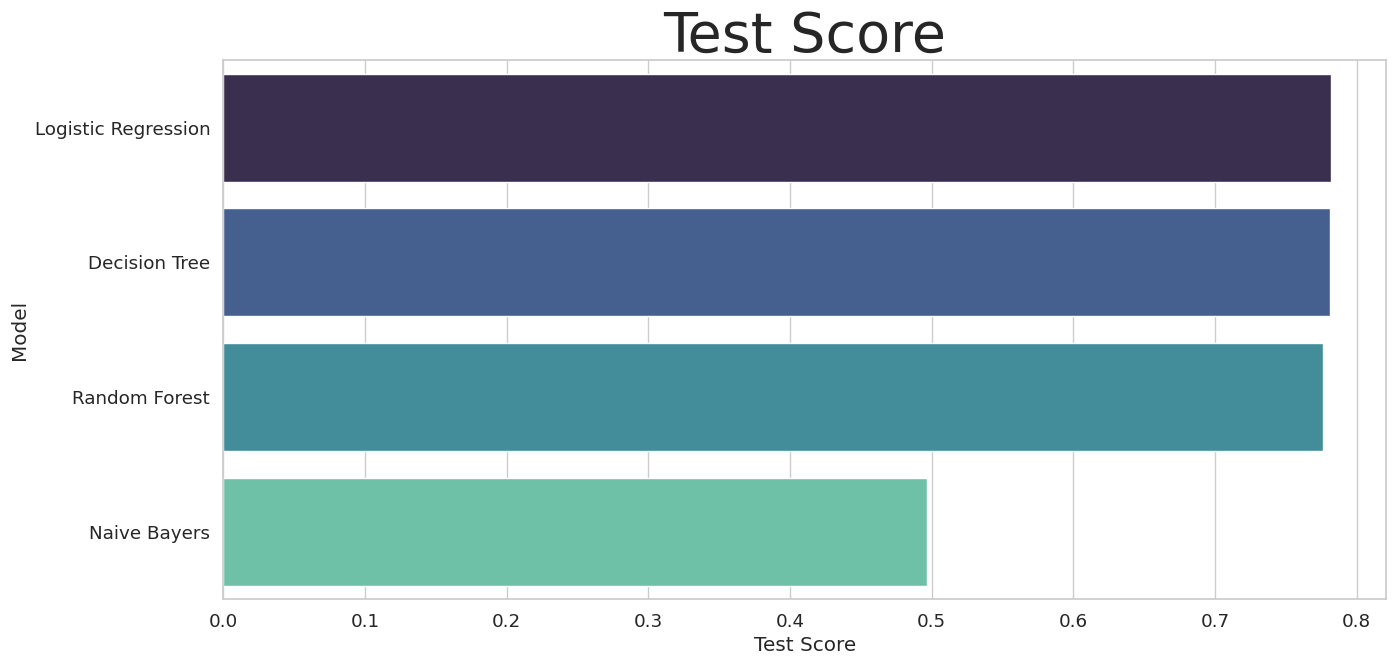

In [797]:
sns.barplot(y= 'Model', x= 'Test Score', data= scores, palette= 'mako')
plt.title('Test Score', fontsize= 40)

Text(0.5, 1.0, 'RMSE')

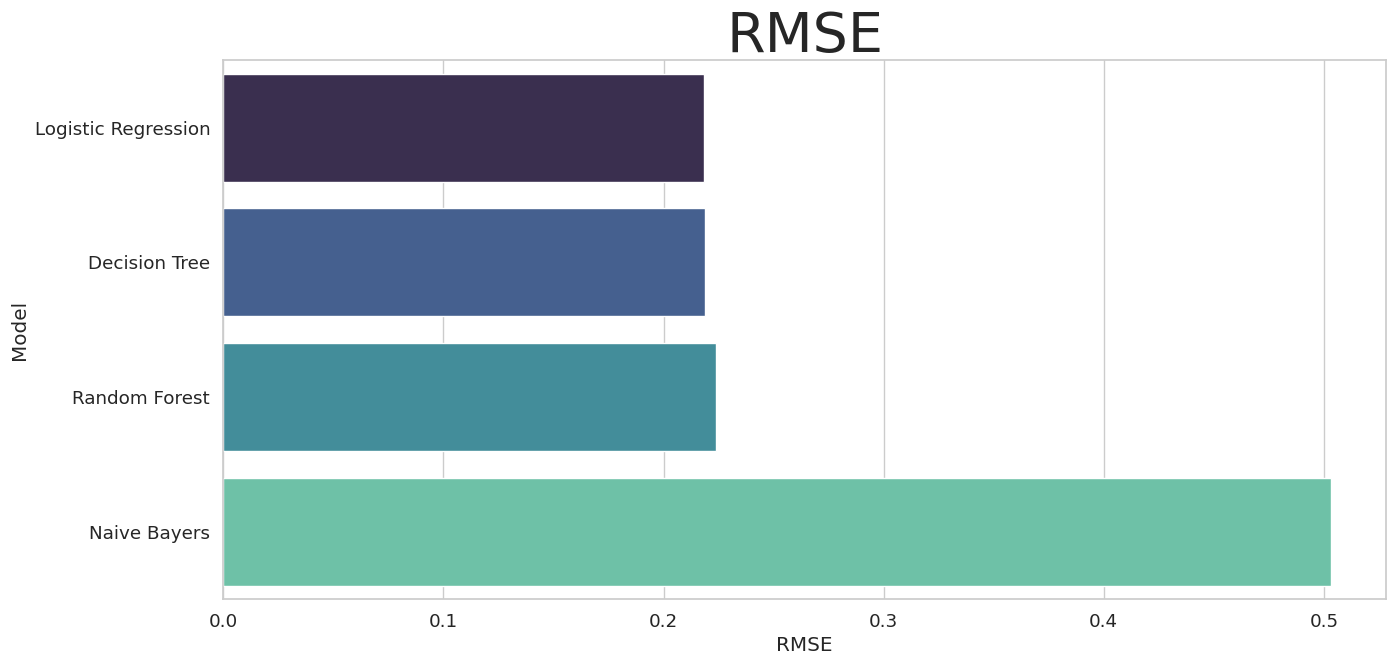

In [798]:
sns.barplot(y= 'Model', x= 'RMSE', data= scores, palette= 'mako')
plt.title('RMSE', fontsize= 40)

## Conclusion

### Chosen model: <b>Logistic Regression</b>